In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from matplotlib.patches import Patch

In [2]:
# Define the path to the datasets in our project
path_93 = "data/1993_Greenland_P3.csv"
# Read the csv file
df_93 = pd.read_csv(path_93)
# Rename each column of the dataframe to make it uniform and easier to type
df_93.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
# make the thickness column float vlaues so we can replace the negative thicknesses with nan values since its impossible to have a negative thickness
df_93['thickness'] = df_93['thickness'].astype(float)
df_93.loc[df_93['thickness'] < 0, 'thickness'] = float('nan')

In [3]:
path_97 = "data/1997_Greenland_P3.csv"
df_97 = pd.read_csv(path_97)
df_97.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
df_97['thickness'] = df_97['thickness'].astype(float)
df_97.loc[df_97['thickness'] < 0, 'thickness'] = float('nan')

In [4]:
path_01 = "data/2001_Greenland_P3.csv"
df_01 = pd.read_csv(path_01)
df_01.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True)
df_01['thickness'] = df_01['thickness'].astype(float)
df_01.loc[df_01['thickness'] < 0, 'thickness'] = float('nan')

In [5]:
path_05 = "data/Browse_2005_Greenland_TO-1.csv"
df_05 = pd.read_csv(path_05)
df_05.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
df_05['thickness'] = df_05['thickness'].astype(float)
df_05.loc[df_05['thickness'] < 0, 'thickness'] = float('nan')

In [6]:
path_09 = "data/Browse_2009_Greenland_TO.csv"
df_09 = pd.read_csv(path_09)
df_09.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True)
df_09['thickness'] = df_09['thickness'].astype(float)
df_09.loc[df_09['thickness'] < 0, 'thickness'] = float('nan')

In [7]:
path_13 = "data/Browse_2013_Greenland_P3.csv"
df_13 = pd.read_csv(path_13)
df_13.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True)
df_13['thickness'] = df_13['thickness'].astype(float)
df_13.loc[df_13['thickness'] < 0, 'thickness'] = float('nan')

In [8]:
path_17 = "data/Browse_2017_Greenland_P3.csv"
df_17 = pd.read_csv(path_17)
df_17.rename(columns = {'LAT':'latitude', 'LON':'longitude','TIME':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
df_17['thickness'] = df_17['thickness'].astype(float)
df_17.loc[df_17['thickness'] < 0, 'thickness'] = float('nan')

In [9]:
path_19 = "data/Browse_2019_Greenland_P3-1.csv"
df_19 = pd.read_csv(path_19)
df_19.rename(columns = {'LAT':'latitude', 'LON':'longitude','UTCTIMESOD':'time','THICK':'thickness','ELEVATION':'elevation', 'FRAME':'frame', 'SURFACE':'surface', 'BOTTOM':'bottom', 'QUALITY':'quality'}, inplace = True) 
df_19['thickness'] = df_19['thickness'].astype(float)
df_19.loc[df_19['thickness'] < 0, 'thickness'] = float('nan')

In [10]:
df_all_data = pd.concat([df_93, df_97, df_01, df_05, df_09, df_13, df_17, df_19], axis=0)

In [11]:
df_all_data.describe()

,latitude,longitude,time,thickness,frame,surface,bottom,quality,UTCTIMESOD
count,492948.000000,492948.000000,390206.000000,492878.000000,4.929480e+05,4.929480e+05,4.929480e+05,492948.000000,102742.000000
mean,71.813966,-46.193706,52708.337916,1456.735059,2.005581e+12,6.363028e+03,7.819555e+03,0.481763,52767.360379
std,5.164350,11.530840,6898.621507,847.958094,1.011969e+10,2.910160e+05,2.910018e+05,0.536267,7560.300128
min,60.803549,-99.989875,36274.244600,0.000000,1.993062e+12,-2.687816e+06,-2.686529e+06,0.000000,33770.095000
25%,68.190792,-49.861649,47340.824675,851.485000,1.997052e+12,4.718500e+02,1.402700e+03,0.000000,46633.054450
50%,70.170318,-47.092521,52140.000000,1394.595000,2.001053e+12,5.589000e+02,1.963300e+03,0.000000,52880.061700
75%,76.848089,-39.392130,57614.293275,2035.940000,2.017042e+12,6.505300e+02,2.652370e+03,1.000000,59021.254025
max,82.967317,28.467686,83025.859300,4113.410000,2.019052e+12,1.203058e+07,1.203188e+07,3.000000,70700.513000


In [12]:
# Create list with the mean ice thickness for each year
thick_mean = []
thick_mean.append(df_93.thickness.mean())
thick_mean.append(df_97.thickness.mean())
thick_mean.append(df_01.thickness.mean())
thick_mean.append(df_05.thickness.mean())
thick_mean.append(df_09.thickness.mean())
thick_mean.append(df_13.thickness.mean())
thick_mean.append(df_17.thickness.mean())
thick_mean.append(df_19.thickness.mean())
# Create a list with the year of data used
years = ['1993', '1997', '2001', '2005', '2009', '2013', '2017', '2019']
# Calculate the standard deviation of the thickness
thick_std = np.std(thick_mean, axis=0)
# Create a varible that we will plot to show the standard devitation
thick_upper = thick_mean + thick_std
thick_lower = thick_mean - thick_std

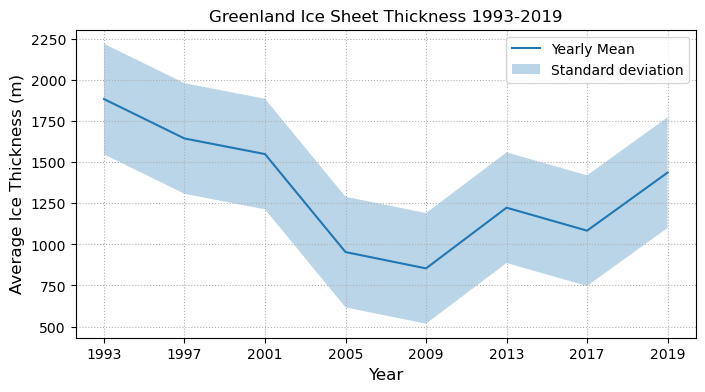

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the mean ice sheet thickness and std
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(years, thick_mean, label='Yearly Mean')
ax.fill_between(years, thick_lower, thick_upper, alpha=0.3, label='Standard deviation')
ax.set_title('Greenland Ice Sheet Thickness 1993-2019')
ax.set_ylabel('Average Ice Thickness (m)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.grid(ls='dotted')
ax.legend()
plt.show()

# Saves the plot as a png
plt.savefig('./figures/average_thickness.png')

In [14]:
# Gather latitude and longitude from each location data was collected by year
# In a seperate cell to reduce run time of the cartopy map since there are over 80000 data points per lat and lon
lat93 = df_93.latitude
lon93 = df_93.longitude
lat97 = df_97.latitude
lon97 = df_97.longitude
lat01 = df_01.latitude
lon01 = df_01.longitude
lon05 = df_05.longitude
lat05 = df_05.latitude
lon09 = df_09.longitude
lat09 = df_09.latitude
lon13 = df_13.longitude
lat13 = df_13.latitude
lon17 = df_17.longitude
lat17 = df_17.latitude
lon19 = df_19.longitude
lat19 = df_19.latitude

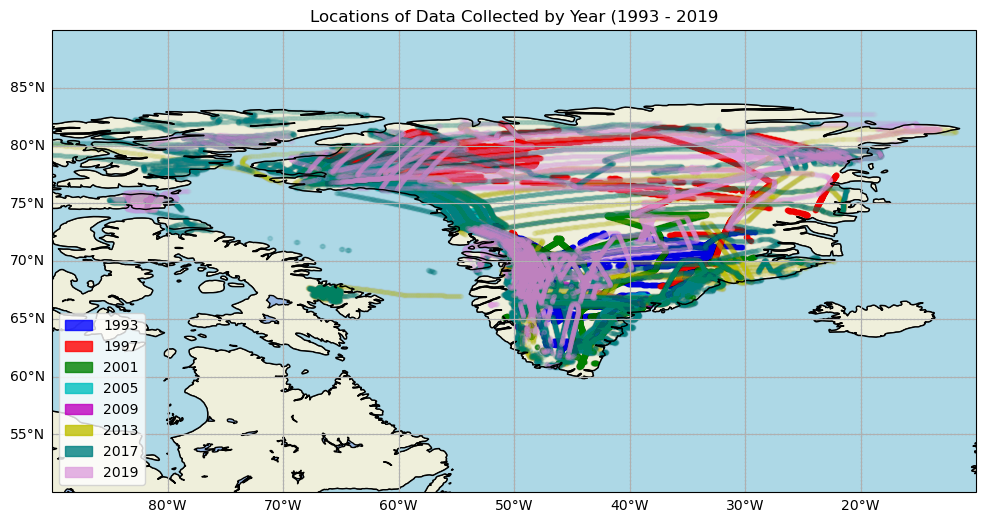

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a map of the locations that the data was collected
# Set bounds of the latitude and longitude based on the readme file provided
extent = [-90, -10, 50, 90] 
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
projection = ccrs.PlateCarree()
plt.figure(figsize=(12, 6))
ax = plt.axes(projection= projection)
ax.set_extent(extent)

# Add features to the map
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')

# Plot the location of each years data collected
a = 0.03
ax.scatter(lon93,lat93, label='93', color ='b', transform = projection,  marker ='.', alpha = a)
ax.scatter(lon97,lat97, label='97', color = 'r', marker ='.', alpha = a)
ax.scatter(lon01,lat01, label='01', color ='g',  marker ='.', alpha = a)
ax.scatter(lon05,lat05, label='05', color='c', marker ='.', alpha = a)
ax.scatter(lon09,lat09, label='09', color='m',  marker ='.', alpha = a)
ax.scatter(lon13,lat13, label='13', color='y', marker ='.', alpha = a)
ax.scatter(lon17,lat17, label='17', color='teal', marker ='.', alpha = a)
ax.scatter(lon19,lat19, label='19', color='plum', marker ='.', alpha = a)

# Add the gridlines and lables of lat and long
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='dotted')
gl.top_labels = False
gl.right_labels = False
ax.gridlines()

# Needed to use matplotlib patch to make the legend visible since we used such a low alpha value in the scatters
b = .8
legend_patches = [Patch(color='b', alpha=b, label='1993'), 
                  Patch(color='r', alpha=b, label='1997'),
                  Patch(color='g', alpha=b, label='2001'),
                  Patch(color='c', alpha=b, label='2005'), 
                  Patch(color='m', alpha=b, label='2009'),
                  Patch(color='y', alpha=b, label='2013'),  
                  Patch(color='teal', alpha=b, label='2017'), 
                  Patch(color='plum', alpha=b, label='2019')] 
plt.legend(handles=legend_patches)
plt.title('Locations of Data Collected by Year (1993 - 2019')
plt.show()

# Saves the plot as a png
plt.savefig('./figures/measurement_locations.png')

In [16]:
df_93

,latitude,longitude,time,thickness,elevation,frame,surface,bottom,quality
0,67.469842,-48.973661,43350.2500,1022.49,1852.0000,1993062301001,671.54,1694.03,0
1,67.470688,-48.971159,43351.2500,993.21,1853.1667,1993062301001,671.54,1664.75,0
2,67.471535,-48.968660,43352.2500,975.20,1853.8333,1993062301001,675.53,1650.73,0
3,67.471959,-48.967411,43352.7500,968.44,1854.0000,1993062301001,679.53,1647.97,0
4,67.472809,-48.964915,43353.7500,990.96,1854.0000,1993062301001,679.53,1670.49,0
...,...,...,...,...,...,...,...,...,...
89725,66.981362,-49.415127,63635.5000,792.77,1442.0000,1993070901034,567.61,1360.38,0
89726,66.981523,-49.420078,63637.0000,770.25,1437.0000,1993070901034,559.61,1329.86,0
89727,66.981523,-49.420078,63637.0001,765.74,1437.0000,1993070901034,559.61,1325.36,0
89728,66.981632,-49.423380,63638.0000,729.71,1433.0000,1993070901034,559.61,1289.32,0


In [17]:
# Creates a numpy array holding the thickness values from 1993
thick93 = df_93.thickness.to_numpy()

# Creates a numpy array holding the thickness values from 2019
thick19 = df_19.thickness.to_numpy()

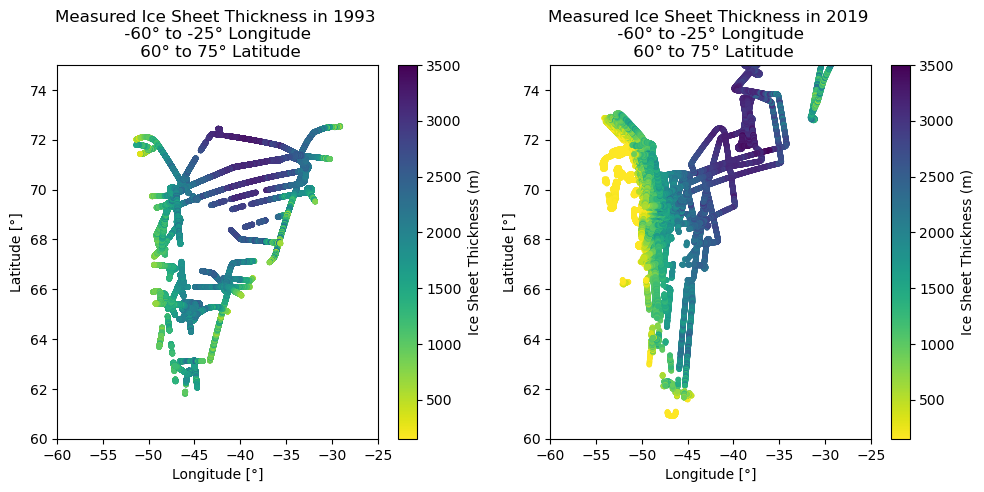

<Figure size 640x480 with 0 Axes>

In [18]:
# Creates a figure and axes for this plot
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax0, ax1 = ax.flatten()

# Sets the latitude, longitude, and thickness boundaries for both plots
# I chose to use a snapshot the encompasses the total survey area from 1993
# This excludes some of the measurements from 2019, which is irrelevant as we do not have data from 1993 to compare them to
lonmin = -60
lonmax = -25
latmin = 60
latmax = 75
thickmin = 150
thickmax = 3500

# Creates a scatter plot with a color gradient for the measurements from 1993
im93 = ax0.scatter(lon93, lat93, c = thick93, marker = ".", clim = (thickmin,thickmax), cmap = 'viridis_r')
ax0.set_ylim(latmin,latmax)
ax0.set_xlim(lonmin,lonmax)
fig.colorbar(im93, ax=ax0, label = 'Ice Sheet Thickness (m)')
ax0.set_xlabel('Longitude [\N{DEGREE SIGN}]')
ax0.set_ylabel('Latitude [\N{DEGREE SIGN}]')
ax0.set_title('Measured Ice Sheet Thickness in 1993 \n -60\N{DEGREE SIGN} to -25\N{DEGREE SIGN} Longitude \n 60\N{DEGREE SIGN} to 75\N{DEGREE SIGN} Latitude') 

# Creates a scatter plot with a color gradient for the measurements from 2019
im19 = ax1.scatter(lon19, lat19, c = thick19, marker = ".", clim = (thickmin,thickmax), cmap = 'viridis_r')
ax1.set_ylim(latmin,latmax)
ax1.set_xlim(lonmin,lonmax)
fig.colorbar(im19, ax=ax1, label = 'Ice Sheet Thickness (m)')
ax1.set_xlabel('Longitude [\N{DEGREE SIGN}]')
ax1.set_ylabel('Latitude [\N{DEGREE SIGN}]')
ax1.set_title('Measured Ice Sheet Thickness in 2019 \n -60\N{DEGREE SIGN} to -25\N{DEGREE SIGN} Longitude \n 60\N{DEGREE SIGN} to 75\N{DEGREE SIGN} Latitude') 

# Sets the spacing between the plots and shows the figure
fig.tight_layout(pad=1)
plt.show()

# Saves the plot as a png
plt.savefig('./figures/lat_vs_lon_thickness.png')

In [19]:
#elevation and change in thickness plot (callum)

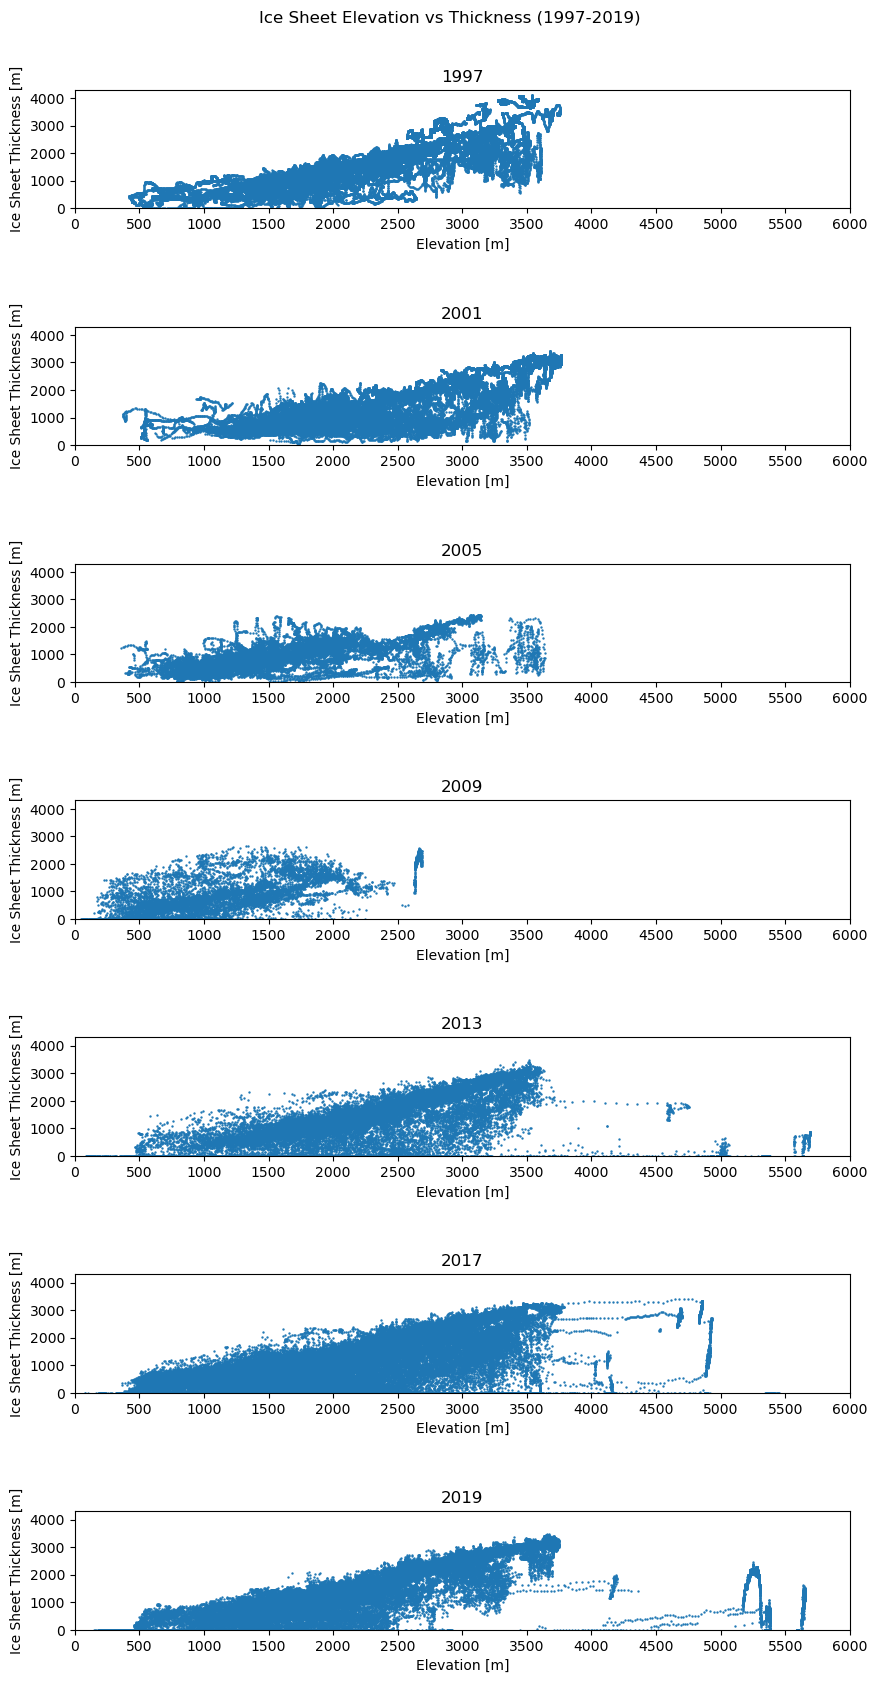

In [20]:
fig, (y97,y01,y05,y09,y13,y17,y19) = plt.subplots(7, figsize = (10,20))
plt.subplots_adjust(hspace=1)

plt.suptitle('Ice Sheet Elevation vs Thickness (1997-2019)', y = .92)

y97.scatter(df_97['elevation'],df_97['thickness'],s=0.5)
y97.xaxis.set_ticks(np.arange(0, 6001, 500))
y97.yaxis.set_ticks(np.arange(0, 4001, 1000))
y97.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y97.set_title('1997')
y97.set_ylabel('Ice Sheet Thickness [m]')
y97.set_xlabel('Elevation [m]')

y01.scatter(df_01['elevation'],df_01['thickness'],s=0.5)
y01.xaxis.set_ticks(np.arange(0, 6001, 500))
y01.yaxis.set_ticks(np.arange(0, 4001, 1000))
y01.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y01.set_title('2001')
y01.set_ylabel('Ice Sheet Thickness [m]')
y01.set_xlabel('Elevation [m]')

y05.scatter(df_05['elevation'],df_05['thickness'],s=0.5)
y05.xaxis.set_ticks(np.arange(0, 6001, 500))
y05.yaxis.set_ticks(np.arange(0, 4001, 1000))
y05.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y05.set_title('2005')
y05.set_ylabel('Ice Sheet Thickness [m]')
y05.set_xlabel('Elevation [m]')

y09.scatter(df_09['elevation'],df_09['thickness'],s=0.5)
y09.xaxis.set_ticks(np.arange(0, 6001, 500))
y09.yaxis.set_ticks(np.arange(0, 4001, 1000))
y09.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y09.set_title('2009')
y09.set_ylabel('Ice Sheet Thickness [m]')
y09.set_xlabel('Elevation [m]')

y13.scatter(df_13['elevation'],df_13['thickness'],s=0.5)
y13.xaxis.set_ticks(np.arange(0, 6001, 500))
y13.yaxis.set_ticks(np.arange(0, 4001, 1000))
y13.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y13.set_title('2013')
y13.set_ylabel('Ice Sheet Thickness [m]')
y13.set_xlabel('Elevation [m]')

y17.scatter(df_17['elevation'],df_17['thickness'],s=0.5)
y17.xaxis.set_ticks(np.arange(0, 6001, 500))
y17.yaxis.set_ticks(np.arange(0, 4001, 1000))
y17.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y17.set_title('2017')
y17.set_ylabel('Ice Sheet Thickness [m]')
y17.set_xlabel('Elevation [m]')

y19.scatter(df_19['elevation'],df_19['thickness'],s=0.5)
y19.xaxis.set_ticks(np.arange(0, 6001, 500))
y19.yaxis.set_ticks(np.arange(0, 4001, 1000))
y19.axis(xmin=0, xmax=6000,ymin=0,ymax=4300)
y19.set_title('2019')
y19.set_ylabel('Ice Sheet Thickness [m]')
y19.set_xlabel('Elevation [m]')

# Saves the plot as a png
plt.savefig('./figures/elevation_vs_thickness.png')